# 4. Web Scraping - Scrapy

<img src='https://xn--kvin-duranty-beb.fr/wp-content/uploads/2022/10/Web-Scraping-_-IPSSI-PRS-3.png'>

Dans cet exercice, nous utiliserons la bibliothèque scrapy afin de collecter les données des sites internet suivants :

- Partie 1 : [AlloCiné](https://www.allocine.fr/film/meilleurs)
Nous collecterons les informations des meilleurs films recensés par la platforme.


- Partie 2 : [Boursorama](https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC)
Nous collecterons les données boursières des entreprises du CAC40.


# Parie 1 - Les meilleurs films selon [Allociné.fr](https://www.allocine.fr/film/meilleurs/)

<img src= 'https://fr.web.img2.acsta.net/newsv7/15/10/19/21/14/237930.jpg'>

L'objectif de cet exercice est de collecter les données des meilleurs films présents sur la page `https://www.allocine.fr/film/meilleurs/` du site allocine.fr.

Les données que nous collecterons seront les suivantes :
- Les titres du film
- Les liens des images
- Les noms des auteurs
- Les durées des films
- Les genres cinématographiques 
- Les scores des films
- Les descriptions des films
- Les dates de sortie des films

## 4.1 Installez scrapy à l'aide de la commande suivante :


`pip install scrapy`


## 4.2 Générez un environement de travail scrapy en executant la commande suivante :

In [ ]:
# Création du dossier WebCrawler contenant l'ensemble des fichiers utiles au fonctionnement de scrapy
!scrapy startproject WebCrawler

In [ ]:
# Création du projet AlloCiné dans le dossier WebCrawler/spider
!cd WebCrawler && scrapy genspider allocine https://www.allocine.fr/film/meilleurs

Les fichiers de scrapy que nous manipulerons seront :

1. le fichier `items.py` qui contient les champs que nous souhaitons collecter (ex : nom des films, score, date de publication). Chaque champs sera introduit dans la class `ReviewsAllocineItem` avec la nomenclature suivante : `name = scrapy.Field()`.


2. le fichier `allocine.py` qui contient les fonctions qui permetons la collecte.

## 4.3 Ajoutez dans le fichier `items.py` les champs que nous souhaitons collecter.

Ajoutez dans la class `ReviewsAllocineItem(scrapy.Item)` les champs suivants,
pour rappel la nomenclature des champs est la suivante : 

`name = scrapy.Field()`.

- title
- img
- author
- time
- genre
- score
- desc
- release

In [ ]:
from scrapy import Item, Field
class ReviewsAllocineItem(Item):
     title   = Field()
     img     = Field()
     author  = Field()
     time    = Field()
     genre   = Field()
     score   = Field()
     desc    = Field()
     reprise = Field()
     page    = Field()

## 4.3 Lancez votre terminal puis exécutez la commande suivante :

C'est dans le terminale que nous intéragirons avec scrapy pour manipuler les bases du site allocine.fr

`scrapy shell`

`url = 'https://www.allocine.fr/film/meilleurs'`

`fetch(url)`

## 4.4 Exécutez dans votre terminal les commandes suivantes et notez vos observations.

Repérez en parallèle à quelles balises correspondent vos résultats.

`response`

`response.css('a')`

`len(response.css('a'))`

`response.css('a::text')`

`response.css('a')[0].attrib`

`response.css('a')[0].attrib['href']`

`response.css('a::text')[0].extract()`

`response.css('h1.item')`

`response.css('h1.item::text')`

`response.css('h1.item::text')[0].extract()`

`response.css('img')`

## 4.5 Recherchez les informations suivantes sous forme de chaine de caractère (str) :

0. La balise qui liste l'ensemble des films
1. Le titre du premier film
2. Le lien de l'image du premier film
3. Le nom de l'auteur du premier film
4. La durée du premier film 
5. Le genre cinématographique du premier film
6. Le score du premier film
7. La description du premier film
8. La date de sortie du premier film

In [ ]:
# 0. La balise qui liste l'ensemble des films
response.css('li.mdl')

#1. Le titre du premier film
response.css('li.mdl h2.meta-title a::text')[0].get()

#2. Le lien de l'image du premier film
response.css('li.mdl img.thumbnail-img')[0].attrib['src']

#3. Le nom de l'auteur du premier film
response.css('li.mdl div.meta-body-direction a::text')[0].get()

#4. La durée du premier film 
response.css('li.mdl div.meta-body-info::text')[0].get().strip()

#5. Le genre cinématographique du premier film
# response.css('li.mdl div.meta-body-info')[0]
# response.xpath('//div[contains(@class,"meta-body-info")]')[0]
response.css('li.mdl div.meta-body-info')[0].css('span::text')[1:]

#6. Le score du premier film
response.css('li.mdl div.rating-item span.stareval-note::text')[0].get()

#7. La description du premier film
response.css('li.mdl div.content-txt::text')[0].get().strip()

#8. La date de sortie du premier film



## 4.6 Complétez le code suivante en fonction des résultats obtenus à la question précédentes

In [ ]:
import scrapy
from scrapy import Request
from WebCrawler.items import ReviewsAllocineItem


class AllocineSpider(scrapy.Spider):
    name = 'allocine'
    allowed_domains = ['www.allocine.fr']
    
    #Liste des pages à collecter
    start_urls = [f'https://www.allocine.fr/film/meilleurs/?page={n}' for n in range(1,10)]


    def start_requests(self):
        for url in self.start_urls:
            yield Request(url=url, callback=self.parse_manga)
        
        
    def parse_manga(self, response):
        liste_film = response.css('li.mdl') # liste l'ensemble des films
        
        
        # Boucle qui parcours l'ensemble des éléments de la liste des films
        for film in liste_film:
            item = ReviewsAllocineItem()

            # Nom du film
            try:
                item['title'] = film.css('li.mdl h2.meta-title a::text').get()
            except:
                item['title'] = 'None'
              
            # Lien de l'image du film
            try:
                item['img'] = film.css('li.mdl img.thumbnail-img').attrib['src']
            except:
                item['img'] = 'None'


            # Auteur du film
            try:
                item['author'] = film.css('li.mdl div.meta-body-direction a::text').get()
            except:
                item['author'] = 'None'
           
            # Durée du film
            try:
                item['time'] = film.css('li.mdl div.meta-body-info::text')[0].get().strip()
            except:
                item['time'] = 'None'

            # Genre cinématographique
            try:
                item['genre'] = film.css('li.mdl div.meta-body-info')[0].css('span::text')[1:]
            except:
                 item['genre'] = 'None'

            # Score du film
            try:
                item['score'] = film.css('li.mdl div.rating-item span.stareval-note::text')[0].get()
            except:
                item['score'] = 'None'

            # Description du film
            try:
                item['desc'] = film.css('li.mdl div.content-txt::text').get().strip()
            except:
                item['desc'] = 'None'

            # Date de reprise
            try:
                item['reprise'] = film.css('li.mdl div.meta-body span.date::text').get()
            except:
                item['reprise'] = 'None'

            # Page
            try:
                item['page'] = response.url.split('page=')[-1]
            except:
                item['page'] = 1

            yield item


## 4.7 Ajoutez l'ensemble de votre code au fichier `allocine.py` se trouvant dans le dossier `spider`, exécutant la commande suivante afin d'obtenir le fichier `allocine.csv` contenant les données collectées.

In [ ]:
!cd WebCrawler/spiders && scrapy crawl allocine -o allocine.csv

## 4.7 Importez la bibliothèque Pandas puis visualisez votre collecte de données

In [34]:
import pandas as pd
df = pd.read_csv('WebCrawlerllocine.csv')
df.head()

,author,desc,genre,img,reprise,score,time,title
0,Wilson Yip,"Film biographique sur la vie de Ip Man, pionni...",Biopic Arts Martiaux,https://fr.web.img2.acsta.net/c_310_420/medias...,NaN,"4,4",1h 45min,Ip Man
1,Steven Spielberg,Alors que les forces alliées débarquent à Omah...,Biopic Arts Martiaux,https://fr.web.img6.acsta.net/c_310_420/medias...,NaN,"3,0",2h 43min,Il faut sauver le soldat Ryan
2,Joseph Kosinski,Après avoir été l’un des meilleurs pilotes de ...,Biopic Arts Martiaux,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",NaN,"3,7",2h 11min,Top Gun: Maverick
3,NaN,1936. L'aventurier Indiana Jones est mandaté p...,Biopic Arts Martiaux,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",NaN,"4,6",1h 56min,Les Aventuriers de l'Arche perdue
4,Jonathan Demme,"Clarice Starling, jeune stagiaire du FBI, est ...",Drame Thriller,https://fr.web.img5.acsta.net/c_310_420/pictur...,7 octobre 2020,"4,8",1h 58min,Le Silence des agneaux


In [21]:
df[df.desc != 'None']

,author,desc,genre,img,reprise,score,time,title
0,Wilson Yip,"Film biographique sur la vie de Ip Man, pionni...",Biopic Arts Martiaux,https://fr.web.img2.acsta.net/c_310_420/medias...,NaN,"4,4",1h 45min,Ip Man
1,Steven Spielberg,Alors que les forces alliées débarquent à Omah...,Biopic Arts Martiaux,https://fr.web.img6.acsta.net/c_310_420/medias...,NaN,"3,0",2h 43min,Il faut sauver le soldat Ryan
2,Joseph Kosinski,Après avoir été l’un des meilleurs pilotes de ...,Biopic Arts Martiaux,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",NaN,"3,7",2h 11min,Top Gun: Maverick
3,NaN,1936. L'aventurier Indiana Jones est mandaté p...,Biopic Arts Martiaux,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",NaN,"4,6",1h 56min,Les Aventuriers de l'Arche perdue
4,Jonathan Demme,"Clarice Starling, jeune stagiaire du FBI, est ...",Drame Thriller,https://fr.web.img5.acsta.net/c_310_420/pictur...,7 octobre 2020,"4,8",1h 58min,Le Silence des agneaux
...,...,...,...,...,...,...,...,...
85,Alfred Hitchcock,Le publiciste Roger Tornhill se retrouve par e...,Comédie,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",NaN,"4,6",2h 16min,La Mort aux trousses
86,Francis Ford Coppola,"Depuis la mort de Don Vito Corleone, son fils ...",Aventure Science Fiction,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",18 septembre 2013,"4,7",3h 20min,"Le Parrain, 2e partie"
87,Milos Forman,Rebellion dans un hôpital psychiatrique à l'in...,Comédie Drame Romance,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",16 septembre 2009,"5,0",2h 09min,Vol au-dessus d'un nid de coucou
88,Peter Farrelly,"En 1962, alors que règne la ségrégation, Tony ...",Aventure Science Fiction,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",NaN,"4,0",2h 10min,Green Book : Sur les routes du sud


# Partie 2 - Cotations boursières du CAC40 - [Boursorama](https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC)


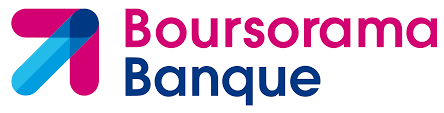



L'objectif de cet exercice sera de collecter les données en temps réelle des actions du CAC40.
Les données que nous collecterons serons :

- le nom de l'indice boursier
- le cours de l'action
- la variation de l'action
- la valeur la plus haute de la séance
- la valeur la plus basse
- la valeur d'ouverture
- la date et l'heure de la collecte


## Lancez le projet scrapy

Créez le projet scrapy nomé `boursorama` en utilisant le lien suivant `https://www.boursorama.com/bourse/actions/palmares/france/page-1`.

Pour rappel la commande scrapy pour génére un nouveau spider est la suivante : 

`scrapy genspider nom_du_projet adresse_url`

In [ ]:
!cd WebCrawler && scrapy genspider Boursorama "https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC"

## Modifiez le fichier items.py en ajoutant les champs à collecter

Ajoutez une class `ReviewsBoursoramaItem(scrapy.Item)` puis les champs avec la nomenclature `name = scrapy.Field()`

## Lancez le shell scrapy

`scrapy shell`

`url = 'https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC'`

`fetch(url)`

## Compléter le code suivant puis ajoutez-le au fichier `boursorama.py`.

In [ ]:
import scrapy
from scrapy import Spider, Request
from WebCrawler.items import BoursoramaItem
from datetime import datetime

class BoursoramaSpider(Spider):
    name = 'boursorama'
    allowed_domains = ['www.boursorama.com']
    start_urls = ['https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC']

    def start_requests(self):
        for url in self.start_urls:
            yield Request(url=url, callback=self.parse_boursorama)
            
    def parse_boursorama(self, response):
        liste_indices = response.css('tr.c-table__row')[1:]
        
        for indice in liste_indices:
            item = BoursoramaItem()
            
            # Indice boursier
            try: 
              item['indice'] = indice.css('tr.c-table__row a::text').get()
            except:
              item['indice'] = 'None'
            
            # Indice cours de l'action
            try: 
              item['cours'] = indice.css('tr.c-table__row span.c-instrument--last::text').get().strip()
            except:item['cours'] = 'None'
            
            # Variation de l'action
            try: 
              item['var'] = indice.css('tr.c-table__row span.c-instrument--instant-variation::text').get().strip()
            except:
              item['var'] = 'None'
            
            # Valeur la plus haute
            try: 
              item['hight'] = indice.css('tr.c-table__row span.c-instrument--high::text').get().strip()
            except:
              item['hight'] = 'None'
            
            # Valeur la plus basse
            try: 
              item['low'] = indice.css('tr.c-table__row span.c-instrument--low::text').get().strip()
            except:
              item['low'] = 'None'

            # Valeur d'ouverture
            try: 
              item['open'] = indice.css('tr.c-table__row span.c-instrument--open::text').get().strip()
            except:
              item['open'] = 'None'

            # Date de la collecte
            try: 
              item['time'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            except:
              item['time'] = 'None'

            
            yield item

## Executez la commande suivante afin de collecter vos données

In [ ]:
!cd WebCrawler/spiders && scrapy crawl boursorama -o boursorama.csv

In [3]:
import pandas as pd
df_bourse = pd.read_csv('WebCrawler/boursorama.csv')
df_bourse.head()

,cours,hight,indice,low,open,time,var
0,9.087,9.142,CREDIT AGRICOLE SA,9.044,9.111,2022-10-26 15:11:48,-0.08%
1,132.140,134.220,AIR LIQUIDE,131.280,132.800,2022-10-26 15:11:48,-0.27%
2,105.220,105.880,AIRBUS,104.300,104.360,2022-10-26 15:11:48,+1.11%
3,19.985,20.030,ALSTOM,19.230,19.240,2022-10-26 15:11:48,+3.82%
4,47.975,48.565,DANONE,47.685,48.455,2022-10-26 15:11:48,-1.26%


# Bonus - [MyAnimeListe](https://myanimelist.net/manga.php?letter=A)

<img src='https://image.myanimelist.net/ui/OK6W_koKDTOqqqLDbIoPArR89MP-ulHxaLCJ2P-BfXg'>

Reproduisez l'ensemble de la procédure en collectant les données du site [MyAnimeListe](https://myanimelist.net/manga.php?letter=A).

Les données à collecter : 
- le nom des animés
- l'image des animés
- la description des animés.

Utilisez la class `DataBase` pour stoquer vos donneés dans une base de données.

In [ ]:
!cd WebCrawler && scrapy genspider myanimelist https://myanimelist.net

In [ ]:
# scrapy shell
# url = "https://myanimelist.net/manga.php?letter=a"
# fetch(url)
# response.url
# 0. liste l'ensemble des animés
# list_anime = response.css('div.js-categories-seasonal tr')[1:]
# 1. Le nom du premier animé
# list_anime[0].css('a.hoverinfo_trigger strong::text').get()
# 2. L'image du premier animé
# list_anime[0].css('img').attrib['data-src']
# 3. La description du premier animé
# list_anime[0].css('div.pt4::text').get()

In [ ]:
from scrapy import Spider, Request
from WebCrawler.items import MyAnimeListItem

class MyanimelistSpider(Spider):
    name = 'myanimelist'
    allowed_domains = ['myanimelist.net']
    alpha_list = ['.','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    #Liste des pages à collecter
    start_urls = [f'https://myanimelist.net/manga.php?letter={n}' for n in alpha_list]

    def start_requests(self):
        for url in self.start_urls:
            yield Request(url=url, callback=self.parse_allocine)
        
        
    def parse_allocine(self, response):
        # liste l'ensemble des animés
        list_anime = response.css('div.js-categories-seasonal tr')[1:]
        
        # Boucle qui parcours l'ensemble des éléments de la liste des films
        for anime in list_anime:
            item = MyAnimeListItem()

            # Nom de l'animé
            try:
                item['title'] = anime.css('td a strong::text').get()
            except:
                item['title'] = 'None'
              
            # Lien de l'image de l'animé
            try:
                item['img'] = anime.css('div.picSurround img').attrib['data-src']
            except:
                item['img'] = 'None'


            # Description de l'animé
            try:
                item['desc'] = anime.css('div.pt4::text').get()
            except:
                item['desc'] = 'None'
            
            # Letter
            # try:
            #     item['page'] = response.url.split('letter=')[-1]
            # except:
            #     item['page'] = 1

            # Page

            yield item

In [ ]:
# Collecter les données
!cd WebCrawler/spiders && scrapy crawl myanimelist -o myanimelist.csv

In [5]:
import pandas as pd
df_anime = pd.read_csv('WebCrawler/myanimelist.csv')
df_anime.head()

,desc,img,title
0,I've posessed the body of the sociopath villai...,https://cdn.myanimelist.net/r/50x70/images/man...,A Beast Tamed by the Villainess
1,"Kyouko, a university student, is in love with ...",https://cdn.myanimelist.net/r/50x70/images/man...,A Bewildering Flower
2,The antics of two high school girls: Kim Peong...,https://cdn.myanimelist.net/r/50x70/images/man...,A Bias Girl
3,"Middle school, year 2, summer. The me who was ...",https://cdn.myanimelist.net/r/50x70/images/man...,A Bitch and a Punk
4,A collection of sweet stories about couples an...,https://cdn.myanimelist.net/r/50x70/images/man...,A Bittersweet Life


In [ ]:
import sqlalchemy as db

class DataBase():
    def __init__(self, name_database='database'):
        self.name = name_database
        self.url = f"sqlite:///{name_database}.db"
        self.engine = db.create_engine(self.url)
        self.connection = self.engine.connect()
        self.metadata = db.MetaData()
        self.table = self.engine.table_names()
       
    
    def create_table(self, name_table, **kwargs):
        colums = [db.Column(k, v, primary_key = True) if 'id_' in k else db.Column(k, v) for k,v in kwargs.items()]
        db.Table(name_table, self.metadata, *colums)
        self.metadata.create_all(self.engine)
        print(f"Table : '{name_table}' are created succesfully")
        
    def read_table(self, name_table, return_keys=False):
        table = db.Table(name_table, self.metadata, autoload=True, autoload_with=self.engine)
        if return_keys:table.columns.keys() 
        else : return table
        
        
    def add_row(self, name_table, **kwarrgs):
        name_table = self.read_table(name_table)
        
        stmt = (
            db.insert(name_table).
            values(kwarrgs)
        )
        self.connection.execute(stmt)
        print(f'Row id added')
        
        
    def delete_row_by_id(self, table, id_):
        name_table = self.read_table(name_table) 
        
        stmt = (
            db.delete(name_table).
            where(students.c.id_ == id_)
            )
        self.connection.execute(stmt)
        print(f'Row id {id_} deleted')
        
    def select_table(self, name_table):
        name_table = self.read_table(name_table)       
        stm = db.select([name_table])
        return self.connection.execute(stm).fetchall()